<a href="https://colab.research.google.com/github/fhhjhhg/A2A/blob/main/SKM_TEA_Dataset_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍵 SKM-TEA Dataset Tutorial
[Paper](https://arxiv.org/abs/2203.06823) | [GitHub](https://github.com/StanfordMIMI/skm-tea)

Welcome to the SKM-TEA dataset demo!

**Dataset**: The *Stanford Knee MRI with Multi-Task Evaluation (SKM-TEA) dataset* is a collection of quantitative knee MRI scans that enables end-to-end benchmarking of MRI reconstruction and analysis methods. This 1.6TB dataset consists of raw-data measurements of ~25,000 slices (155 patients) of anonymized patient MRI scans, the corresponding scanner-generated DICOM images, manual segmentations of four tissues, and bounding box annotations for sixteen clinically relevant pathologies.

**Brief**: In this demo, we will walk through the data and how to use [the codebase](https://github.com/StanfordMIMI/skm-tea) to run pre-trained models and perform evaluation with your own methods.

- Inspect different data types in SKM-TEA *DICOM* and *Raw Data* Tracks
- Use pretrained models from the [model zoo](https://github.com/StanfordMIMI/skm-tea/blob/main/MODEL_ZOO.md)
- Perform clinically-relevant quantitative MRI (qMRI) evaluation

Interested in learning how to train models with SKM-TEA, check out [this tutorial](https://colab.research.google.com/drive/1LUC0MqFYK39xG5AV9kQi5hIBsi9eCpS0?usp=sharing)

**Time**: 25-30 minutes

**Colab Runtime**: We recommend running this Colab with a GPU runtime. To change the runtime,
1. Click on `Runtime` on the top navigation bar
2. Select `Change runtime type`
3. Select `GPU` from the dropdown

**NOTE**: This tutorial is under development. Please contact the arjundd \<at stanford email domain\> with any bugs or recommendations.

**Acknowledgements**: SKM-TEA is built on the [Meddlr](https://github.com/ad12/meddlr) image reconstruction and analysis framework.

**Coming Soon:**
- Tutorial with detection (bounding box) labels

## 📡 Downloading the Data
Let's download a [mini version](https://huggingface.co/datasets/arjundd/skm-tea-mini) of the SKM-TEA dataset from Huggingface. This mini dataset was created for building demos/tutorials with the SKM-TEA dataset. **Do not use this dataset for reporting/publication purposes**

*NOTE*: This download process can take ~5-8 minutes.

> If you would like to set up up the full SKM-TEA dataset on your machine, follow [these instructions](https://github.com/StanfordMIMI/skm-tea/blob/main/DATASET.md).

In [ ]:
import os
from tqdm import tqdm

dataset_dir = "skm-tea/v1-release"
url = "https://huggingface.co/datasets/arjundd/skm-tea-mini/resolve/main/v1-release"
force_download = False


if force_download:
  !rm -rf $dataset_dir

if not os.path.isdir(dataset_dir):
  os.makedirs(dataset_dir)
  for fname in ["all_metadata.csv", "annotations/v1.0.0/train.json", "annotations/v1.0.0/val.json", "annotations/v1.0.0/test.json"]:
    out = f"{dataset_dir}/{fname}"
    os.makedirs(os.path.dirname(out), exist_ok=True)
    !wget -q $url/$fname -O $out


  for fname in tqdm(["dicoms", "files_recon_calib-24", "image_files", "segmentation_masks"], disable=False):
    !wget -c $url/"tarball"/$fname".tar.gz" -O - | tar -xz -C $dataset_dir/

!ls

  0%|          | 0/4 [00:00<?, ?it/s]

--2022-12-28 02:00:16--  https://huggingface.co/datasets/arjundd/skm-tea-mini/resolve/main/v1-release/tarball/dicoms.tar.gz
Resolving huggingface.co (huggingface.co)... 23.22.186.9, 34.202.56.10, 34.238.87.3, ...
Connecting to huggingface.co (huggingface.co)|23.22.186.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/47/ef/47efd2294ecec7e3542307fb653e6d9b3f2360461d5ff9792f19e96022b48fbe/8613f4af54a6e496301a69f99d7eb99bc979fd2cc5358a030d8cc701fa86a2ac?response-content-disposition=attachment%3B%20filename%3D%22dicoms.tar.gz%22&Expires=1672452018&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzQ3L2VmLzQ3ZWZkMjI5NGVjZWM3ZTM1NDIzMDdmYjY1M2U2ZDliM2YyMzYwNDYxZDVmZjk3OTJmMTllOTYwMjJiNDhmYmUvODYxM2Y0YWY1NGE2ZTQ5NjMwMWE2OWY5OWQ3ZWI5OWJjOTc5ZmQyY2M1MzU4YTAzMGQ4Y2M3MDFmYTg2YTJhYz9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0IlMjBmaWxlbmFtZSUzRCUyMmRpY29tcy50YXIuZ3olMjIiLCJDb25

 25%|██▌       | 1/4 [00:14<00:43, 14.40s/it]

--2022-12-28 02:00:31--  https://huggingface.co/datasets/arjundd/skm-tea-mini/resolve/main/v1-release/tarball/files_recon_calib-24.tar.gz
Resolving huggingface.co (huggingface.co)... 34.238.87.3, 18.235.116.140, 23.22.186.9, ...
Connecting to huggingface.co (huggingface.co)|34.238.87.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/47/ef/47efd2294ecec7e3542307fb653e6d9b3f2360461d5ff9792f19e96022b48fbe/c0f1345ca275ba81d4f9d5485c761b3b3df96ec3c9311d86633bf834db670996?response-content-disposition=attachment%3B%20filename%3D%22files_recon_calib-24.tar.gz%22&Expires=1672452032&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzQ3L2VmLzQ3ZWZkMjI5NGVjZWM3ZTM1NDIzMDdmYjY1M2U2ZDliM2YyMzYwNDYxZDVmZjk3OTJmMTllOTYwMjJiNDhmYmUvYzBmMTM0NWNhMjc1YmE4MWQ0ZjlkNTQ4NWM3NjFiM2IzZGY5NmVjM2M5MzExZDg2NjMzYmY4MzRkYjY3MDk5Nj9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0IlMjBmaWxlbmFtZSUzRCUyM

 50%|█████     | 2/4 [15:19<17:56, 538.46s/it]

--2022-12-28 02:15:36--  https://huggingface.co/datasets/arjundd/skm-tea-mini/resolve/main/v1-release/tarball/image_files.tar.gz
Resolving huggingface.co (huggingface.co)... 23.22.186.9, 54.152.211.32, 34.238.87.3, ...
Connecting to huggingface.co (huggingface.co)|23.22.186.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/47/ef/47efd2294ecec7e3542307fb653e6d9b3f2360461d5ff9792f19e96022b48fbe/18af509e31f4468dbb5b237bf1a124508d00ade4ace0b90fae62947ce4709812?response-content-disposition=attachment%3B%20filename%3D%22image_files.tar.gz%22&Expires=1672452937&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzQ3L2VmLzQ3ZWZkMjI5NGVjZWM3ZTM1NDIzMDdmYjY1M2U2ZDliM2YyMzYwNDYxZDVmZjk3OTJmMTllOTYwMjJiNDhmYmUvMThhZjUwOWUzMWY0NDY4ZGJiNWIyMzdiZjFhMTI0NTA4ZDAwYWRlNGFjZTBiOTBmYWU2Mjk0N2NlNDcwOTgxMj9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0IlMjBmaWxlbmFtZSUzRCUyMmltYWdlX2ZpbGVzLnRh

 75%|███████▌  | 3/4 [15:42<05:03, 303.09s/it]

--2022-12-28 02:15:59--  https://huggingface.co/datasets/arjundd/skm-tea-mini/resolve/main/v1-release/tarball/segmentation_masks.tar.gz
Resolving huggingface.co (huggingface.co)... 34.238.87.3, 34.202.56.10, 23.22.186.9, ...
Connecting to huggingface.co (huggingface.co)|34.238.87.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/47/ef/47efd2294ecec7e3542307fb653e6d9b3f2360461d5ff9792f19e96022b48fbe/dc83cbc45e92d459931ab3aec423ba98744f897fae73950bbb6cabb254a493b9?response-content-disposition=attachment%3B%20filename%3D%22segmentation_masks.tar.gz%22&Expires=1672452960&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzQ3L2VmLzQ3ZWZkMjI5NGVjZWM3ZTM1NDIzMDdmYjY1M2U2ZDliM2YyMzYwNDYxZDVmZjk3OTJmMTllOTYwMjJiNDhmYmUvZGM4M2NiYzQ1ZTkyZDQ1OTkzMWFiM2FlYzQyM2JhOTg3NDRmODk3ZmFlNzM5NTBiYmI2Y2FiYjI1NGE0OTNiOT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0IlMjBmaWxlbmFtZSUzRCUyMnNlZ21

100%|██████████| 4/4 [15:50<00:00, 237.64s/it]

sample_data  skm-tea


## 🚧 Setup
All SKM-TEA code for training, evaluation, models, and more ships as a Python package. In this tutorial, we will learn how to use different parts of this package.

> To use the latest version from the `main` branch, use `pip install git+https://github.com/StanfordMIMI/skm-tea.git`

In [ ]:
# Download SKM-TEA from main branch on GitHub
!pip install --upgrade pytorch-lightning==1.7.7 skm-tea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 708 kB 34.4 MB/s 
     |████████████████████████████████| 73 kB 2.0 MB/s 
     |████████████████████████████████| 512 kB 63.6 MB/s 
     |████████████████████████████████| 151 kB 68.5 MB/s 
     |████████████████████████████████| 177 kB 50.5 MB/s 
     |████████████████████████████████| 42 kB 100 kB/s 
     |████████████████████████████████| 50 kB 2.3 MB/s 
     |████████████████████████████████| 1.2 MB 70.6 MB/s 
     |████████████████████████████████| 191 kB 63.1 MB/s 
     |████████████████████████████████| 267 kB 73.5 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 3.2 MB 63.9 MB/s 
     |████████████████████████████████| 2.0 MB 67.5 MB/s 
     |████████████████████████████████| 7.0 MB 67.2 MB/s 
     |████████████████████████████████| 79 kB 5.0 MB/s 
     |████████████████████████████████|

In [ ]:
import os
os.environ["MEDDLR_DATASETS_DIR"] = "./"

from pprint import pprint

import numpy as np
import torch
import h5py
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import pandas as pd
from torch import nn

import dosma as dm

import meddlr.ops as oF
from meddlr.data import DatasetCatalog, MetadataCatalog
from meddlr.utils.logger import setup_logger
from meddlr.utils import env

import skm_tea as st

In [ ]:
# Set the default device if cuda is enabled
if torch.cuda.is_available():
  DEVICE = torch.device("cuda")
else:
  DEVICE = torch.device("cpu")

print("Device: ", DEVICE)

Device:  cuda


In [ ]:
# Run this setup phase only once.
# Otherwise, you may get multiple print statements
setup_logger()
logger = setup_logger("skm_tea")
path_mgr = env.get_path_manager()

In [ ]:
# Some general utilities

from typing import Union, Sequence

def get_scaled_image(
    x: Union[torch.Tensor, np.ndarray], percentile=0.99, clip=False
):
  """Scales image by intensity percentile (and optionally clips to [0, 1]).

  Args:
    x (torch.Tensor | np.ndarray): The image to process.
    percentile (float): The percentile of magnitude to scale by.
    clip (bool): If True, clip values between [0, 1]

  Returns:
    torch.Tensor | np.ndarray: The scaled image.
  """
  is_numpy = isinstance(x, np.ndarray)
  if is_numpy:
    x = torch.as_tensor(x)

  scale_factor = torch.quantile(x, percentile)
  x = x / scale_factor
  if clip:
    x = torch.clip(x, 0, 1)

  if is_numpy:
    x = x.numpy()

  return x


def plot_images(
    images, processor=None, disable_ticks=True, titles: Sequence[str]=None,
    ylabel: str=None, xlabels: Sequence[str]=None, cmap: str="gray",
    show_cbar: bool = False, overlay = None, opacity: float = 0.3,
    hsize=5, wsize=5, axs=None
):
  """Plot multiple images in a single row.

  Add an overlay with the `overlay=` argument.
  Add a colorbar with `show_cbar=True`.
  """
  def get_default_values(x, default=""):
    if x is None:
      return [default] * len(images)
    return x

  titles = get_default_values(titles)
  ylabels = get_default_values(images)
  xlabels = get_default_values(xlabels)

  N = len(images)
  if axs is None:
    fig, axs = plt.subplots(1, N, figsize=(wsize * N, hsize))
  else:
    assert len(axs) >= N
    fig = axs.flatten()[0].get_figure()

  for ax, img, title, xlabel in zip(axs, images, titles, xlabels):
    if processor is not None:
      img = processor(img)
    im = ax.imshow(img, cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

  if overlay is not None:
    for ax in axs.flatten():
      im = ax.imshow(overlay, alpha=opacity)

  if show_cbar:
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)

  if disable_ticks:
    for ax in axs.flatten():
      ax.get_xaxis().set_ticks([])
      ax.get_yaxis().set_ticks([])

  return axs


## 💾 Understanding the Data
The SKM-TEA dataset consists of two *tracks* that are based on the source of the input image: the *Raw Data* track, where inputs start from the complex-valued k-space, and the *DICOM* track, where inputs start from magnitude DICOM images.

Note, the Raw Data track supports all reconstruction (upstream) and image analysis (downstream) tasks available in SKM-TEA with the caveat that all downstream tasks are performed on the image reconstructed from the raw data.

In contrast, the DICOM track only supports image analysis tasks -- it does not support the reconstruction tasks. Read [this paper](https://arxiv.org/abs/2109.08237) for more information on why DICOM images may not be good targets for measuring reconstruction performance.


The `skm_tea` package simplifies getting relevant data paths and metadata using the `DatasetCatalog` manager. We can load any of the dataset splits:
- `'skmtea_v1_train'`
- `'skmtea_v1_val'`
- `'skmtea_v1_test'`

In [ ]:
# Load list of dictionaries for the SKM-TEA v1 training dataset.
dataset_dicts = DatasetCatalog.get("skmtea_v1_train")

In [ ]:
scan = dataset_dicts[0]
pprint(scan)

{'dicom_dir': './skm-tea/v1-release/dicoms/MTR_201',
 'dicom_mask_file': './skm-tea/v1-release/segmentation_masks/dicom-track/MTR_201.nii.gz',
 'file_name': 'MTR_201.h5',
 'gw_corr_mask_file': './skm-tea/v1-release/segmentation_masks/raw-data-track/MTR_201.nii.gz',
 'id': 1,
 'image_file': './skm-tea/v1-release/image_files/MTR_201.h5',
 'inspected': True,
 'matrix_shape': [512, 512, 160],
 'num_coils': 8,
 'num_echoes': 2,
 'orientation': ['SI', 'AP', 'LR'],
 'recon_file': './skm-tea/v1-release/files_recon_calib-24/MTR_201.h5',
 'scan_id': 'MTR_201',
 'subject_id': 225,
 'timepoint': 0,
 'voxel_spacing': [0.3125, 0.3125, 0.8]}


### Raw Data Track
The raw data track consists of (1) multi-coil kspace, (2) complex-valued ground truth reconstructions, (3) sensitivity maps, (4) gradient-warp corrected segmentations, and (5) localized bounding boxes for knee pathologies.

While qDESS is a 3D sequence, the SI (axial) readout dimension is fully-sampled, and can be reconstructed without information loss using the 1D inverse fast Fourier transform (ifft). Thus, reconstructions are performed on 2D axial ($k_y \times k_z$) slices.

Also, note that the reference segmentations for the raw data track are different than those for the DICOM track to correct for DICOM-specfic post-processing. See [our paper](https://arxiv.org/abs/2203.06823) for more information.

In [ ]:
sl = 200  # the slice to be plotted

# Reconstruction data
recon_file = scan["recon_file"]
with h5py.File(recon_file, "r") as f:
    kspace = f["kspace"][sl, :, :, :, :]  # Shape: (x, ky, kz, #echos, #coils)
    image = f["target"][sl, :, :, :, :]   # Shape: (x, ky, kz, #echos, #maps) - #maps = 1 for SKM-TEA
    maps = f["maps"][sl, :, :, :, :]      # Shape: (x, ky, kz, #coils, #maps) - maps are the same for both echos

# Segmentation data
seg_file = scan["gw_corr_mask_file"]
segmentation = dm.read(seg_file).A[sl, ...]  # Shape: (x, y, z)
print(segmentation.shape)

(512, 160)


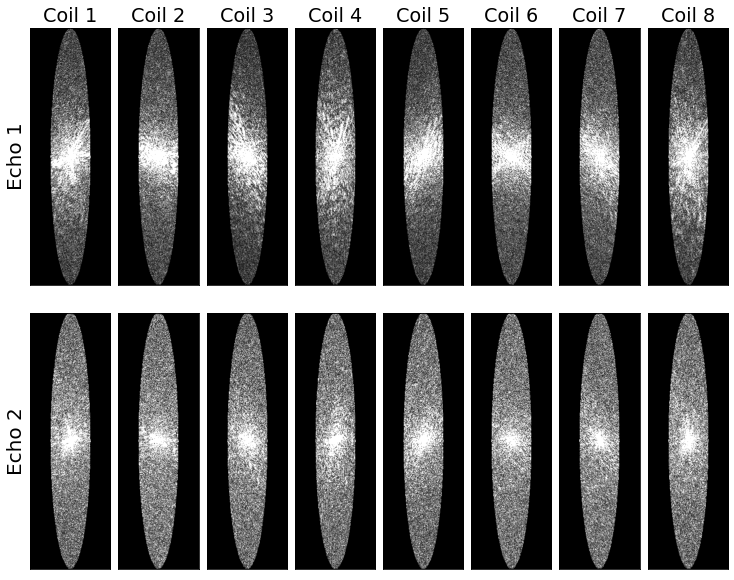

In [ ]:
# Display kspace per coil
n_coils = kspace.shape[-1]
nrows = 2
hsize = 5
wsize = hsize / kspace.shape[0] * kspace.shape[1]
_, axs = plt.subplots(nrows, n_coils, figsize=(n_coils * wsize, nrows * hsize))

for echo in range(2):
  kspace_coils = [np.abs(kspace[..., echo, idx]) for idx in range(n_coils)]
  # Scale the kspace to avoid over-saturating the image with center kspace
  kspace_coils = [get_scaled_image(x, 0.95, clip=True) for x in kspace_coils]

  titles = [f"Coil {idx+1}" for idx in range(n_coils)] if echo==0 else None
  plot_images(kspace_coils, titles=titles, axs=axs[echo])
  axs[echo][0].set_ylabel("Echo {}".format(echo + 1), fontsize=20)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

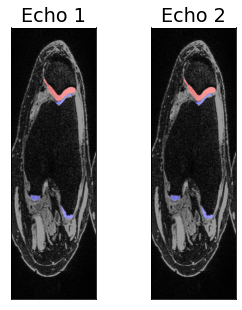

In [ ]:
# Plot reconstructed image
mag_img = np.abs(image)
seg_colorized = label2rgb(segmentation, bg_label=0)


_ = plot_images(
  [mag_img[..., 0, 0], mag_img[..., 0, 0]],  # echo1, echo2
  processor=lambda x: get_scaled_image(x, 0.95, clip=True),
  titles=["Echo 1", "Echo 2"],
  overlay=seg_colorized,
  opacity=0.4,
  hsize=5, wsize=2.3
)


### DICOM Track
The DICOM Track consists of (1) scanner-generated DICOM images, (2) tissue segmentations, and (3) pathology bounding boxes.

**IMPORTANT**: As mentioned above, this data should only be used for image analysis (segmentation, detection, classification) tasks. It should not be used for reconstruction tasks.


Let's visualize a sagittal slice from both echos.

In [ ]:
sl = 60  # the slice to be plotted

# DICOM data + segmentation
image_file = scan["image_file"]
with h5py.File(image_file, "r") as f:
    echo1 = f["echo1"][:, :, sl]  # Shape: (x, y, z)
    echo2 = f["echo2"][:, :, sl]  # Shape: (x, y, z)
    segmentation = f["seg"][:, :, sl, :]  # Shape: (x, y, z, #classes)

segmentation = oF.one_hot_to_categorical(segmentation, channel_dim=-1)

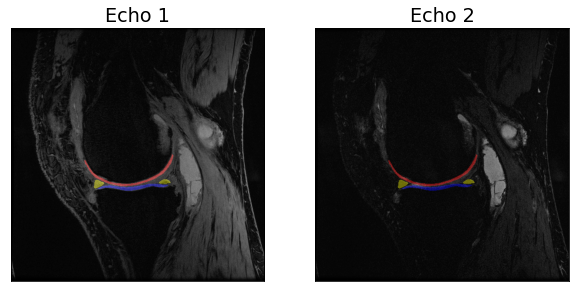

In [ ]:
# Plot reconstructed image
seg_colorized = label2rgb(segmentation, bg_label=0)

_ = plot_images(
  [echo1, echo2],
  titles=["Echo 1", "Echo 2"],
  overlay=seg_colorized,
  opacity=0.4,
)

## 🐘 Model Zoo
Interested in running a pre-trained model on your data? We got you!

We maintain a model zoo of pre-trained models that have been trained on the SKM-TEA dataset for different tasks. You can find a list of these models on [GitHub](https://github.com/StanfordMIMI/skm-tea).

And loading the model is as easy as 123! Just use the `skm_tea.get_model_from_zoo`.

In [ ]:
# Load a scan from the test dataset.
dataset_dicts = DatasetCatalog.get("skmtea_v1_test")
scan = dataset_dicts[0]

### Reconstruction
Let's use a pretrained [unrolled network](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7664163/) to reconstruct 6x accelerated qDESS scans.

The reconstruction model was trained to reconstruction axial ($k_y \times k_z$) slices for the first echo. You can find other pretrained reconstruction models [here](https://github.com/StanfordMIMI/skm-tea/blob/main/MODEL_ZOO.md#reconstruction-baselines).

*Aside*: When reporting results on the SKM-TEA dataset, please use the masks provided with the dataset.

In [ ]:
# Simulate 6x undersampled data
sl = 256

with h5py.File(scan["recon_file"], "r") as f:
    kspace = torch.as_tensor(f["kspace"][sl, :, :, :, :]).unsqueeze(0)
    maps = torch.as_tensor(f["maps"][sl, :, :, :, :]).unsqueeze(0)
    mask = torch.as_tensor(f["masks/poisson_6.0x"][()]).unsqueeze(0)  # TODO: Fix
    img_gt = torch.as_tensor(f["target"][sl, :, :, :, :]).unsqueeze(0)
mask = oF.zero_pad(mask, kspace.shape[1:3])

us_kspace = kspace * mask.unsqueeze(-1).unsqueeze(-1).type(kspace.dtype)

In [ ]:
# Fetch the model with pretrained weights.
model = st.get_model_from_zoo(
    cfg_or_file="https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/recon-models/6x/Unrolled_E1/config.yaml",
    weights_path="https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/recon-models/6x/Unrolled_E1/model.ckpt",
).to(DEVICE).eval()

[05/11 06:35:58 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/recon-models/6x/Unrolled_E1/config.yaml...
[05/11 06:35:58 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/recon-models/6x/Unrolled_E1/config.yaml...
[05/11 06:35:58 mr.utils.path]: File cached to /root/.cache/meddlr/url/huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/recon-models/6x/Unrolled_E1/config.yaml
[05/11 06:35:58 mr.utils.path]: File cached to /root/.cache/meddlr/url/huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/recon-models/6x/Unrolled_E1/config.yaml
[05/11 06:35:58 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/recon-models/6x/Unrolled_E1/model.ckpt...
[05/11 06:35:58 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/recon-models/6x/Unrolled_E1/model.ckpt..

In [ ]:
echo = 0  # the 1st echo
echo1_kspace = us_kspace[..., echo, :]
with torch.no_grad():
    pred = model({"kspace": echo1_kspace, "maps": maps})["pred"].cpu()
echo1_recon = pred

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efc20611a90>,
      dtype=object)

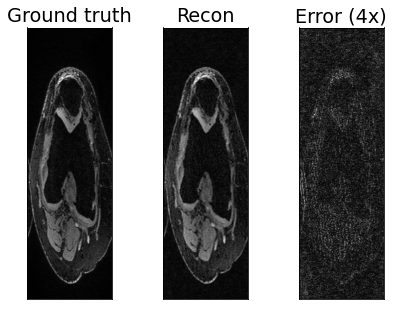

In [ ]:
# For visualization purposes, we scale the ground truth and reconstructions
# to get rid of very bright outliers.
gt_abs = get_scaled_image(img_gt[..., 0, :].abs(), 0.9999, clip=True)
recon_abs = get_scaled_image(echo1_recon.abs(), 0.9999, clip=True)
err = torch.abs(gt_abs - recon_abs)

plot_images(
    [gt_abs, recon_abs, err * 4],
    processor=lambda x: x.abs().squeeze(),
    titles=["Ground truth", "Recon", "Error (4x)"],
    hsize=5, wsize=2.3
)

### Segmentation
Let's perform segmentation on the DICOM track dataset using a pretrained [U-Net](https://arxiv.org/abs/1505.04597).

The segmentation model was trained to segment sagittal slices for the first echo. You can find other pretrained segmentation models [here](https://github.com/StanfordMIMI/skm-tea/blob/main/MODEL_ZOO.md#segmentation-baselines).

**Note:** The volume has to first be normalized to have zero-mean and unit standard deviation. In the near future, this will automatically be done.

In [ ]:
model = st.get_model_from_zoo(
    cfg_or_file="https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/segmentation-models/U-Net_E1/config.yaml",
    weights_path="https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/segmentation-models/U-Net_E1/model.ckpt",
).eval()

[05/11 06:36:19 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/segmentation-models/U-Net_E1/config.yaml...
[05/11 06:36:19 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/segmentation-models/U-Net_E1/config.yaml...
[05/11 06:36:19 mr.utils.path]: File cached to /root/.cache/meddlr/url/huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/segmentation-models/U-Net_E1/config.yaml
[05/11 06:36:19 mr.utils.path]: File cached to /root/.cache/meddlr/url/huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/segmentation-models/U-Net_E1/config.yaml
[05/11 06:36:19 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/segmentation-models/U-Net_E1/model.ckpt...
[05/11 06:36:19 mr.utils.path]: Downloading file from https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/segmentation-models/U-Net_E1/model.

In [ ]:
from meddlr.data.data_utils import collect_mask
sl = 88  # the slice to segment

# DICOM data + segmentation
image_file = scan["image_file"]
with h5py.File(image_file, "r") as f:
    echo1 = f["echo1"][()]  # Shape: (x, y, z)
    segmentation = f["seg"][()]  # Shape: (x, y, z, #classes)

echo1 = torch.as_tensor(echo1).unsqueeze(0).unsqueeze(0).float()  # Shape: (B, C, H, W)

# Ground truth segmentation
# Medial/lateral components are aggregated into the same category.
# 0 - patellar cartilage, 1 - femoral cartilage
# 2/3 - medial/lateral tibial cartilage, 4/5 - medial/lateral meniscus
gt_seg_sl = segmentation[..., sl, :]
gt_seg_sl = collect_mask(gt_seg_sl, (0, 1, (2, 3), (4, 5)), out_channel_first=False)
gt_seg_sl = oF.one_hot_to_categorical(gt_seg_sl, channel_dim=-1)

In [ ]:
# Normalize volume and run model.
echo1 = (echo1 - echo1.mean()) / echo1.std()
echo1_sl = echo1[..., sl]

with torch.no_grad():
    logits = model({"image": echo1_sl})["sem_seg_logits"]

prediction = oF.pred_to_categorical(logits, activation='sigmoid').squeeze(0)

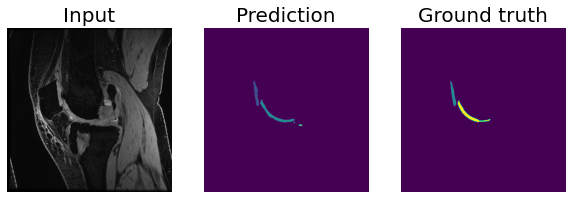

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(10,5))
for idx, (data, title) in enumerate([
  (echo1_sl.squeeze(), "Input"), (prediction, "Prediction"), (gt_seg_sl, "Ground truth")
]):
    ax = axs[idx]
    ax.imshow(data.squeeze(), cmap="gray" if idx == 0 else None)
    ax.set_title(title, fontsize=20)
    ax.axis("off")

## 📊 qMRI Evaluation
SKM-TEA introduces a new family of metrics based on quantitative MRI (qMRI) endpoints. In this section, we will explore the utility of these metrics and how to use them to benchmark your models.

Specifically, we will consider a qMRI knee analysis pipeline that uses qDESS reconstructions to analytically estimate $T_2$ maps and uses automated segmentations to get region-specific $T_2$ values.

As a proof-of-concept, let's dive into how we can use qMRI endpoints to evaluate a segmentation model based on regional $T_2$ accuracy. We will evaluate the same pretrained U-Net model from the [Model Zoo section](https://colab.research.google.com/drive/1PluqK77pobD5dXE7zzBLEAeBgaaeGKXa?authuser=1#scrollTo=zOBE1rQAMl6Y&line=6&uniqifier=1).

<img src='https://drive.google.com/uc?id=1LhO6GlVWtyOZ5AmBFrgdECakqtPOfH2k'>

In [ ]:
from skm_tea.metrics import QuantitativeKneeMRI
from meddlr.data.data_utils import collect_mask

from dosma.scan_sequences import QDess

In [ ]:
# Load a scan and corresponding metadata.
dataset_dicts = DatasetCatalog.get("skmtea_v1_test")
scan = dataset_dicts[0]

metadata: pd.DataFrame = MetadataCatalog.get("skmtea_v1_test").scan_metadata
metadata = metadata[metadata["MTR_ID"] == scan["scan_id"]]

In [ ]:
# Load the DICOMs for this scan.
dr = dm.DicomReader(group_by=["EchoNumbers", "SeriesDescription"], verbose=True, num_workers=4)
volumes = dr.load(scan["dicom_dir"])

# Filter out unnecessary dicoms.
volumes = [v for v in volumes if "T2" not in v.get_metadata("SeriesDescription")]
assert len(volumes) == 2
echo1, echo2 = tuple(sorted(volumes, key=lambda x: x.get_metadata("EchoNumbers")))

  0%|          | 0/480 [00:00<?, ?it/s]

In [ ]:
# Load the ground truth segmentation.
seg_gt = dm.read(scan["dicom_mask_file"])
arr = oF.categorical_to_one_hot(seg_gt.A, channel_dim=-1)
arr = collect_mask(arr, (0, 1, (2,3), (4,5)), out_channel_first=False)

seg_gt = dm.MedicalVolume(arr, affine=seg_gt.affine)

### Run the model

In [ ]:
def run_segmentation(
    mv: dm.MedicalVolume, model: nn.Module, normalize=True,
    batch_size: int = 4, pbar: bool = True
):
  """Runs a segmentation model on the qDESS volume.

  The model should be trained to segment sagittal slices.

  Args:
    x (dm.MedicalVolume): A 3D magnitude image (single echo).
    model (nn.Module): The segmentation model to run.
    normalize (bool): Whether to perform zero-mean, unit-std normalization.
    batch_size (int): The batch size for performing segmentation.
    pbar (bool): Whether to display progress bar.

  Returns:
    dm.MedicalVolume: The one-hot predictions from the segmentation model
      where last dimension/axis is the channel dimension.
  """
  mv_ornt = mv.orientation
  mv = mv.reformat(("LR", "SI", "AP"))
  affine = mv.affine.copy()

  x = mv.to_torch().type(torch.float32)
  if normalize:
    x = (x - x.mean()) / x.std()

  x_chunks = torch.split(x, batch_size, dim = 0)

  logits = []
  for chunk in tqdm(torch.split(x, batch_size, dim=0), disable=not pbar):
    chunk = chunk.unsqueeze(1)  # add a channel dimension
    out = model({"image": chunk})
    logits.append(out["sem_seg_logits"])


  logits = torch.concat(logits, dim=0)
  prediction = torch.sigmoid(logits).permute(0, 2, 3, 1)  # make channels last

  out = dm.MedicalVolume.from_torch(prediction, affine).reformat(mv_ornt)
  return out

In [ ]:
torch.cuda.empty_cache()

model = st.get_model_from_zoo(
    cfg_or_file="https://huggingface.co/arjundd/skm-tea-models/raw/main/neurips2021/segmentation-models/U-Net_E1/config.yaml",
    weights_path="https://huggingface.co/arjundd/skm-tea-models/resolve/main/neurips2021/segmentation-models/U-Net_E1/model.ckpt",
).to(DEVICE).eval()

In [ ]:
with torch.no_grad():
  seg_pred = run_segmentation(echo1.to(DEVICE), model, batch_size=4)

100%|██████████| 40/40 [00:04<00:00,  9.97it/s]


### Computing $T_2$ Maps

Computing  $T_2$  maps from qDESS can be done analytically, which is much faster than traditional fitting. To do so, we require a few scan parameters as well as rough estimates for  $T_1$  of tissues. Scan parameters can be found in the DICOM files or the metadata file shipped with the dataset.

An open-source implementation of the analytical fit is available in dosma. To ensure standardization, dosma should be used to perform all qMRI evaluation in SKM-TEA.

IMPORTANT: Do not use the scanner-generated $T_2$ maps (available in the dicom folder) for analysis. These should be used for visualization purposes only.

As mentioned above, we need rough estimates for $T_1$ of tissues for the analytical $T_2$ estimation. From [literature](), we know that femoral, tibial, and patellar (articular) cartilage has a $T_1$ of approximately 1.2sec and meniscus has a $T_1$ of ~1sec.

We can use the segmentation to fill in the expected $T_1$ values. Note, we will have 2 $T_1$ maps -- one from the ground truth segmentation (`t1_gt`), and one from the predicted segmentation (`t1_pred`).

In [ ]:
# For reconstruction, this would be based on reconstructions for E1/E2.
# Estimated T1 values are 1.2s for cartilage and 1s for meniscus
def get_t1(seg: dm.MedicalVolume):
  """Build T1 maps based on the segmentation.

  `seg[..., 3]` should correspond to the meniscus segmentation map.

  Args:
    seg (dm.MedicalVolume): A one-hot encoded segmentation mask, where the
      last dimension is the channel dimension.

  Returns:
    dm.MedicalVolume: The estimated T1 map (in milliseconds).
  """
  t1 = dm.MedicalVolume(np.ones(seg.shape[:3]) * 1200, seg.affine).to(seg.device)
  t1[seg.A[..., 3].astype(bool)] = 1000
  return t1

t1_gt = get_t1(seg_gt)
t1_pred = get_t1(seg_pred)

In [ ]:
def compute_t2_map(t1: dm.MedicalVolume):
  qdess = QDess([echo1, echo2]).to(t1.device)
  t2map = qdess.generate_t2_map(
      suppress_fat=True,
      suppress_fluid=True,
      gl_area=float(metadata["SpoilerGradientArea"]),
      tg=float(metadata["SpoilerGradientTime"]),
      tr=float(metadata["RepetitionTime"]),
      te=float(metadata["EchoTime1"]),
      alpha=float(metadata["FlipAngle"]),
      t1=t1,
      nan_bounds=(0, 100),
      nan_to_num=True,
  )
  return t2map.volumetric_map

t2_gt = compute_t2_map(t1_gt)
t2_pred = compute_t2_map(t1_pred)

/usr/local/lib/python3.7/dist-packages/dosma/scan_sequences/mri/qdess.py:217: RuntimeWarning: divide by zero encountered in true_divide
  ratio = mask * echo_2 / echo_1
/usr/local/lib/python3.7/dist-packages/dosma/scan_sequences/mri/qdess.py:217: RuntimeWarning: invalid value encountered in true_divide
  ratio = mask * echo_2 / echo_1
/usr/local/lib/python3.7/dist-packages/dosma/core/med_volume.py:1348: RuntimeWarning: overflow encountered in true_divide
  volume = ufunc(*_inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/dosma/core/med_volume.py:1348: RuntimeWarning: divide by zero encountered in log
  volume = ufunc(*_inputs, **kwargs)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efbad622e50>,
      dtype=object)

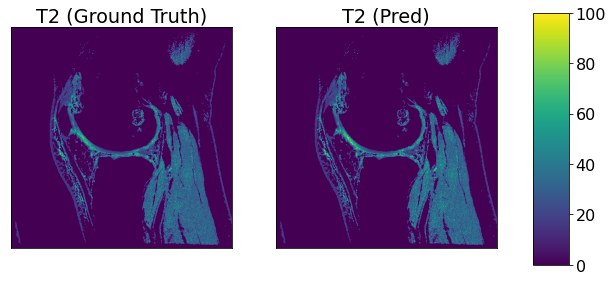

In [ ]:
sl = 60  # Sagittal slice to plot

plot_images(
  [t2_gt, t2_pred],
  processor=lambda x: x.cpu().A[..., sl],
  titles=["T2 (Ground Truth)", "T2 (Pred)"],
  cmap="viridis", show_cbar=True,
)


### The `QuantitativeKneeMRI` metric

`QuantitativeKneeMRI` metrics simplifies computing and tracing qMRI related metrics for key knee anatomical structures.

We will use `qmri_gt` and `qmri_pred` to track regional $T_2$ measures extracted from the ground truth and predicted segmentations, respectively. These regions will correspond to the four segmented tissues: patellar cartilage (`pc`), femoral cartilage (`fc`), tibial cartilage (`tc`), and meniscus (`men`)

We can also choose to compute qMRI measures for anatomically relevant subregions in the these tissues. To do this, set `use_subregions=True`. Note the subregion division can be time intensive.

**Note**: The metric is stateful. This means each time the metric is called, it stores the results. Use `.reset()` to reset the metric and clear all stored results.

*Aside*: These metrics are automatically computed under the hood with the [`skm_tea.evaluation.SkmTeaEvaluator`](https://github.com/StanfordMIMI/skm-tea/blob/main/skm_tea/evaluation/qdess_evaluation.py).

In [ ]:
use_subregions = False
use_cpu = use_subregions  # computing subregions is currently limited to the CPU
tissues = ["pc", "fc", "tc", "men"]

qmri_gt = QuantitativeKneeMRI(channel_names=tissues, subregions=use_subregions, use_cpu=use_cpu)
qmri_pred = QuantitativeKneeMRI(channel_names=tissues, subregions=use_subregions, use_cpu=use_cpu)

In [ ]:
# Reset the metrics
qmri_gt.reset()
qmri_pred.reset()

# Compute regional qMRI estimates using ground truth and predicted segmentations.
qmri_gt(ids=[scan["scan_id"]], quantitative_map=[t2_gt], sem_seg=[seg_gt], medial_direction=metadata["MedialDirection"])
qmri_pred(ids=[scan["scan_id"]], quantitative_map=[t2_pred], sem_seg=[seg_pred], medial_direction=metadata["MedialDirection"])

tensor([[42.3458, 36.8364, 37.0895, 21.2125]], dtype=torch.float64)

In [ ]:
print("Ground Truth Regional T2 Estimates:")
display(qmri_gt.to_pandas())

Ground Truth Regional T2 Estimates:


,id,fc,men,pc,tc
0,MTR_030,41.5291,21.427894,35.421288,35.843274


In [ ]:
print("Predicted Regional T2 Estimates:")
display(qmri_pred.to_pandas())

Predicted Regional T2 Estimates:


,id,fc,men,pc,tc
0,MTR_030,42.345765,36.836437,37.089475,21.212488
